# Netflix Movies and TV Shows data analysis

In [95]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [96]:
df=pd.read_csv("netflix_titles.csv")

In [97]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


# shape

In [98]:
df.shape

(8807, 12)

# size

In [99]:
df.size

105684

# columns

In [100]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

# dtypes

In [101]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

# info

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


# remove duplicate record in dataset

In [103]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [104]:
df.shape

(8807, 12)

In [105]:
df.duplicated

<bound method DataFrame.duplicated of      show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Ga

In [106]:
df[df.duplicated]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


# there any anull avalue in data sets

In [107]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [108]:
df.isnull()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,False,False,False,False,False,False,False,False,False,False,False,False
8803,False,False,False,True,True,True,False,False,False,False,False,False
8804,False,False,False,False,False,False,False,False,False,False,False,False
8805,False,False,False,False,False,False,False,False,False,False,False,False


In [109]:
df.isnull().sum()   # count of all null values

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

<Axes: >

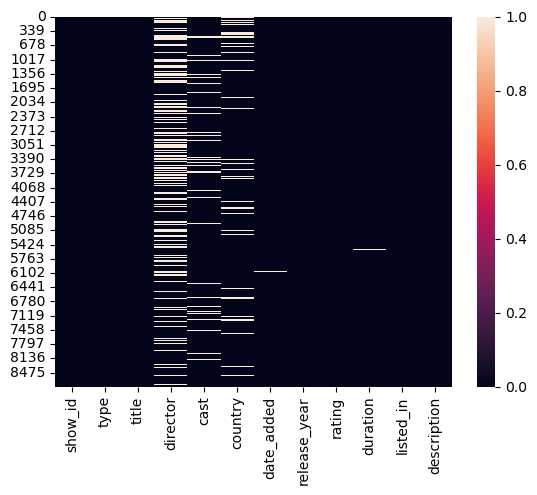

In [110]:
sns.heatmap(df.isnull())

# Q.1 what is the show id and what is the directure of this show

In [111]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [112]:
df['title'].isin(['house of card'])

0       False
1       False
2       False
3       False
4       False
        ...  
8802    False
8803    False
8804    False
8805    False
8806    False
Name: title, Length: 8807, dtype: bool

In [113]:
df[df['title'].isin(['house of card'])]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


# in which  year highest no of tv show and movies were relised show the graphical formate

In [114]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [115]:
df['Data_N'] = pd.to_datetime(df['release_year'])



In [116]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Data_N
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",1970-01-01 00:00:00.000002020
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",1970-01-01 00:00:00.000002021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1970-01-01 00:00:00.000002021
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1970-01-01 00:00:00.000002021
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,1970-01-01 00:00:00.000002021


In [117]:
df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added              object
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
Data_N          datetime64[ns]
dtype: object

In [118]:
df['Data_N'].dt.year.value_counts()

Data_N
1970    8807
Name: count, dtype: int64

# bar graph

<Axes: xlabel='Data_N'>

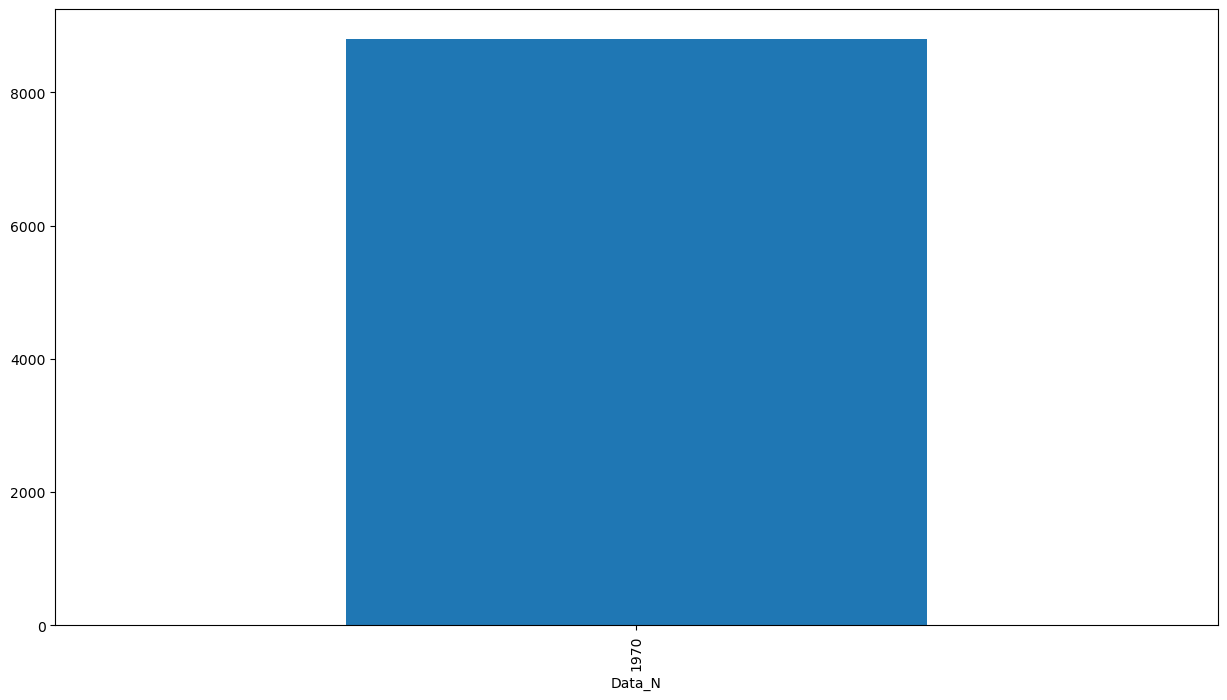

In [119]:
plt.figure(figsize=(15,8))
df['Data_N'].dt.year.value_counts().plot(kind='bar')

# how many movies and tv show in data sets

In [120]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Data_N
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",1970-01-01 00:00:00.000002020
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",1970-01-01 00:00:00.000002021


In [121]:
df.groupby('type').count()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Data_N
type,,,,,,,,,,,,
Movie,6131,6131,5943,5656,5691,6131,6131,6129,6128,6131,6131,6131
TV Show,2676,2676,230,2326,2285,2666,2676,2674,2676,2676,2676,2676


## count plot

['Movie' 'TV Show']


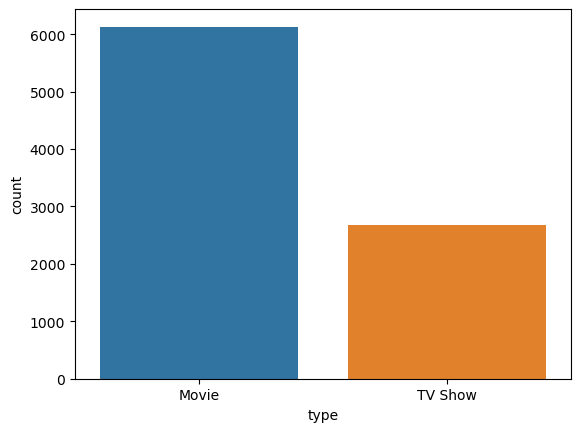

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check the unique values in the 'type' column to ensure they're appropriate
print(df['type'].unique())

# Plot the countplot
sns.countplot(x='type', data=df)
plt.show()


# show the movies that years in 2000

In [123]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Data_N
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",1970-01-01 00:00:00.000002020
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",1970-01-01 00:00:00.000002021


In [124]:
# Convert 'release_year' to datetime format
df['release_year'] = pd.to_datetime(df['release_year'], format='%Y', errors='coerce')

# Now, you can use the .dt accessor to extract the year
df['Data_N'] = df['release_year'].dt.year

# Check the result
print(df[['release_year', 'Data_N']].head())


  release_year  Data_N
0   2020-01-01    2020
1   2021-01-01    2021
2   2021-01-01    2021
3   2021-01-01    2021
4   2021-01-01    2021


In [125]:
(df['type']=='movies')(df['release_year']==2000)

TypeError: 'Series' object is not callable

In [ ]:
filtered_df = df[(df['type'] == 'movies') & (df['release_year'] == 2000)]

# Display the result
print(filtered_df)


# show only the tv show that released in india only

In [ ]:
df.head(3)

In [ ]:
df(df(['type'])=='tv show') & (df['country']==india)

In [ ]:
 filtered_df = df[(df['type'] == 'tv show') & (df['country'] == 'india')]

# Display the result
print(filtered_df)


# # show top ten directure name

In [ ]:
df['director'].value_counts().head(10)

# show  all movies category in type is comedy  and country is india

In [ ]:
df.head(1)

In [ ]:
filtered_df = df[(df['type'] == 'movies') & (df['listed_in'] == 'comedies')]

# Display the result
print(filtered_df)


In [ ]:
df.head(1)

## how many movies and tom cruies was cast?

In [ ]:
df.cast

In [ ]:
df[df['cast']=='Ama Qamata']

## creating new data frame

In [ ]:
df_new=df.dropna()

In [ ]:
df_new.head(3)

### what are the different rating define by netflix?

In [ ]:
df.head(3)

In [ ]:
df['rating'].unique()


### how many movies and tv shows in tv -14 ratinr in a canada

In [ ]:
df.head(2)

In [ ]:
df[(df['type']=='movies') & (df['rating']=='TV-MA')].count()


In [ ]:
[(df['type']=='movies') & (df['rating']=='TV-MA')]

In [ ]:
df[(df['type']=='movies') & (df['rating']=='TV-MA')] & (df['country']=='United States')

### what is mximum duration of movies /shows on netflix

In [ ]:
df.head(2)

In [ ]:
df.duration.unique()

In [ ]:
df.duration.dtypes

In [ ]:
df[['minutes','unit']]=df['duration'].str.split('  ' , expend=True)

In [ ]:
df[['minutes', 'unit']] = df['duration'].str.split('  ', expand=True)


In [ ]:
df['min'].max()

### which individual country has  higest  no of tv shows

In [128]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Data_N
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020-01-01,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2020
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021-01-01,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021


In [ ]:
df_tvshow=df[df['type']=='TV Show']

In [ ]:
df_tvshow.head()

In [ ]:
df_tvshow.country.value_counts()

In [ ]:
df_tvshow.country.value_counts().head(2)

### how can  sort thw value in years

In [ ]:
df.sort_values(by='release_year')


In [ ]:
df.sort_values(by='release_year',ascending=False)

#### find all the movies types is dramas

In [ ]:
df.head(4)

In [127]:
df['type']=='Movie'

0        True
1       False
2       False
3       False
4       False
        ...  
8802     True
8803    False
8804     True
8805     True
8806     True
Name: type, Length: 8807, dtype: bool

In [130]:
df[(df['type']=='Movie') & (df['type']=='TV Show')].head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Data_N
